In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('rock_density_xray.csv')

In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns = ['Signal', 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

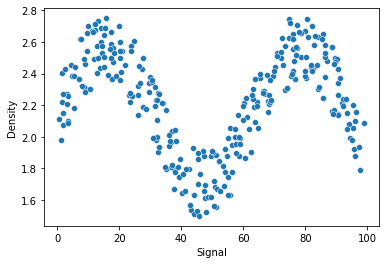

In [6]:
sns.scatterplot(data=df, x='Signal', y='Density')

**Create X and y**

In [7]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

**Train | Test Slit**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Function used to run the models**

In [9]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    signal_range = np.arange(0, 100)
    output = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x='Signal', y='Density')
    plt.plot(signal_range, output, color='red')  

### Linear Regression

MAE: 0.211198973318633
RMSE: 0.2570051996584629


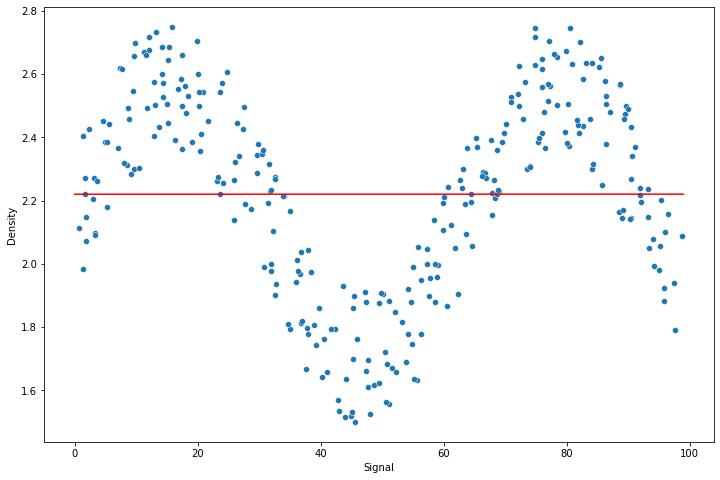

In [10]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

### Polynomial Regression

In [11]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE: 0.11969085253552043
RMSE: 0.13807383449323551


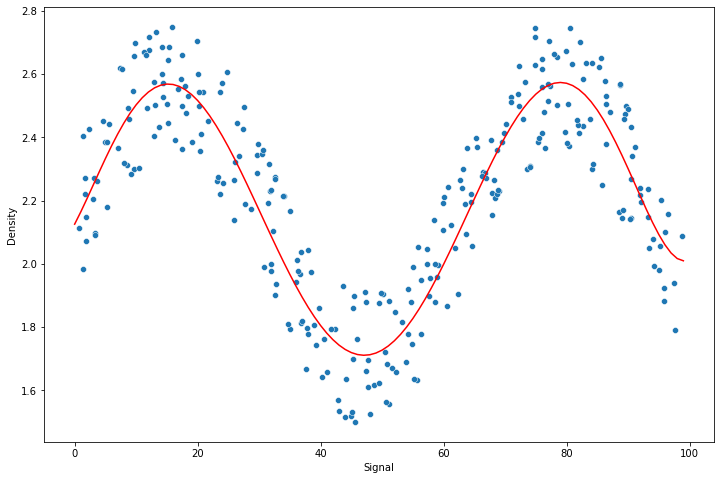

In [12]:
run_model(pipe, X_train, y_train, X_test, y_test)

### K-Neighbors

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926


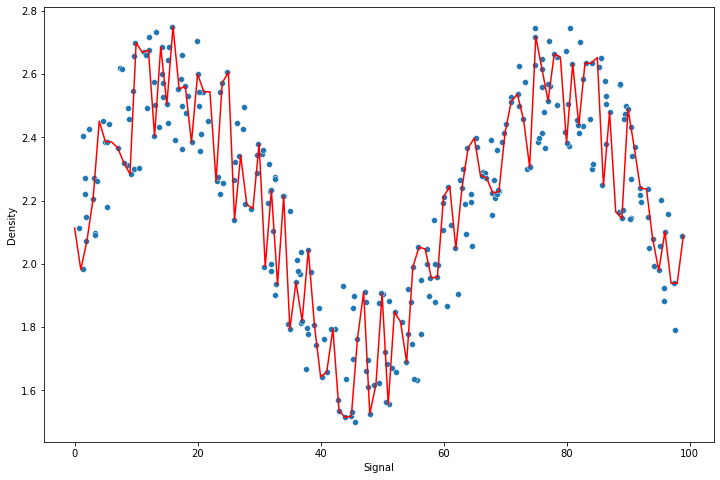

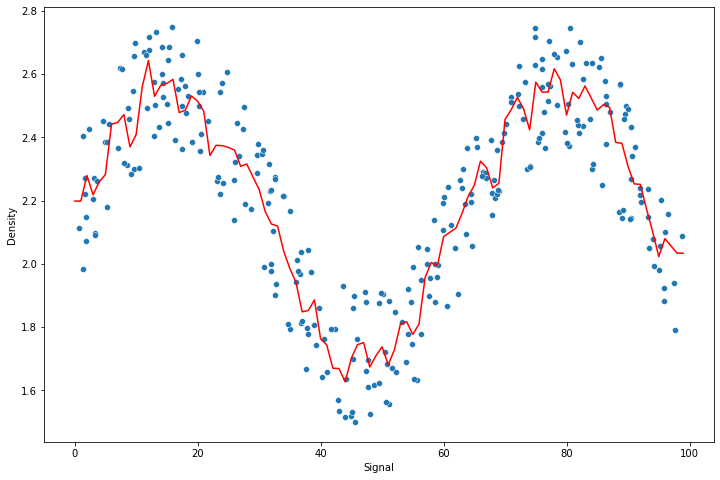

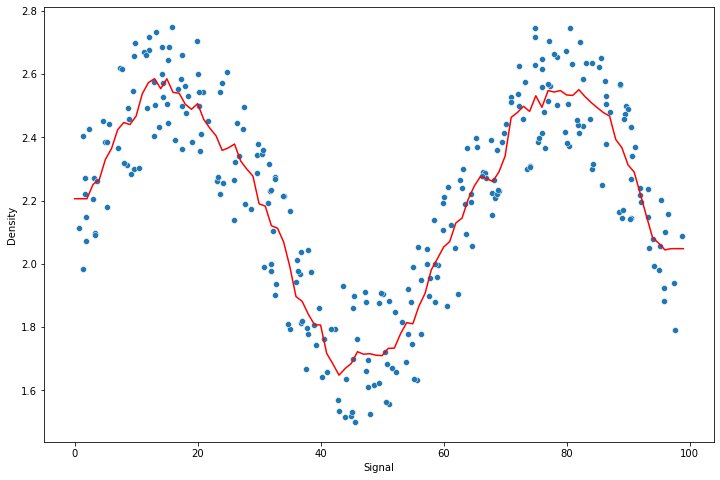

In [13]:
k_values = [1, 5, 10]

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    run_model(model, X_train, y_train, X_test, y_test)

### Decision Tree

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


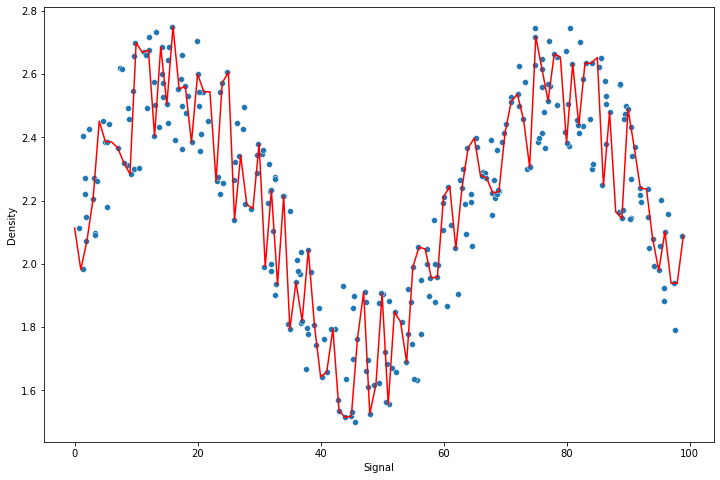

In [14]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

### Suport Vector Machine

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


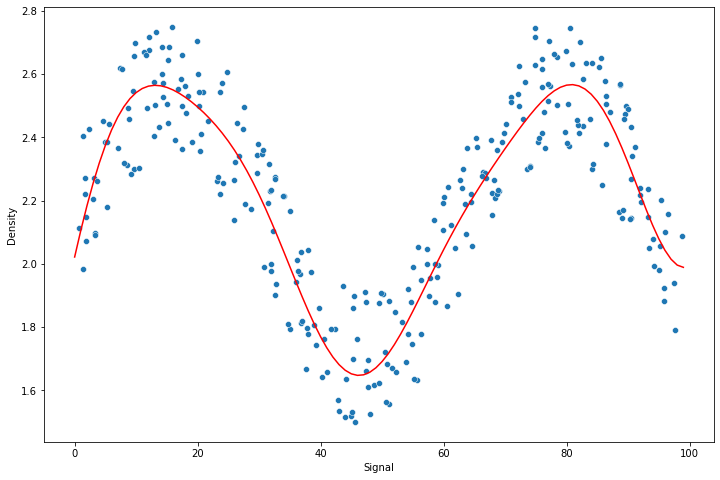

In [15]:
svr = SVR()
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
    'gamma':['auto', 'scale']
}
grid = GridSearchCV(svr, param_grid)
run_model(grid, X_train, y_train, X_test, y_test)

### Random Forest

MAE: 0.11536358850569078
RMSE: 0.1340689988669992


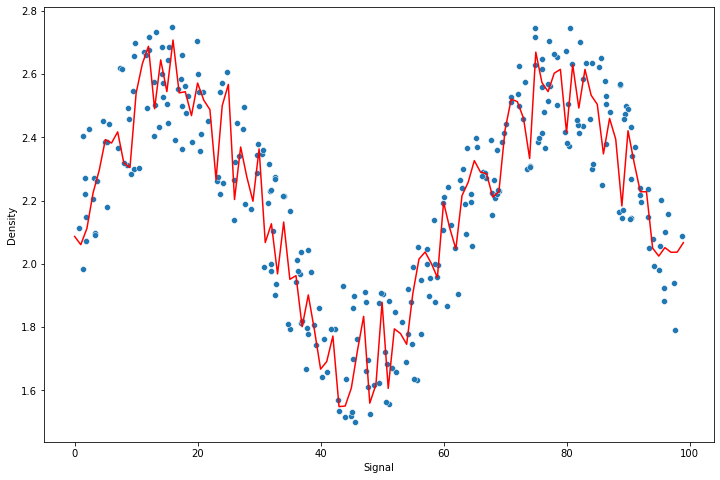

In [16]:
rfr = RandomForestRegressor(n_estimators=10)
run_model(rfr, X_train, y_train, X_test, y_test)